The Toshakhana case in Pakistan involves allegations of former government officials receiving luxury vehicles and other gifts from foreign leaders and dignitaries. The case centers around a toshakhana, or treasure trove, where such gifts are kept. The Supreme Court of Pakistan ordered an investigation into the case in 2018 and directed the National Accountability Bureau (NAB) to probe the matter.

The investigation found that former presidents, prime ministers, and other officials had accepted gifts worth millions of dollars, but had not declared them to the government or paid the required taxes on them. The case has stirred controversy in Pakistan, with some arguing that the officials violated ethical and legal norms by accepting the gifts, while others defend the practice as a diplomatic courtesy.

The case is ongoing, with several high-profile figures, including former presidents and prime ministers, being summoned by the NAB for questioning. The outcome of the case will have important implications for Pakistan's political and legal systems, as it raises questions about the transparency and accountability of its leaders.

Here are few questions we can ask from this dataset:

What is the total value of all gifts received by former government officials from foreign leaders and dignitaries?
Which specific individuals received gifts from the Toshakhana, and what were those gifts?
Did any government officials declare the gifts they received to the Pakistani government or pay taxes on them?

In [1]:
import numpy as np
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pakistan-toshakhana-files/Refined_TK_data ver 2.csv
/kaggle/input/pakistan-toshakhana-files/Toshakhana Files 2.xlsx


In [2]:
df=pd.read_csv('/kaggle/input/pakistan-toshakhana-files/Refined_TK_data ver 2.csv')
print("done")

done


In [3]:
df.head(10)



,Detail of Gifts,Item Category,Name of Recipient,Affiliation,Date,Assessed Value,Retention Cost,Retained,Remarks
0,Two small silver\nBowls,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen. Musharrafarraf,1/8/2002,5000.0,0.0,Yes,Yes
1,One Pilot Pen with\nink,Pen,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen. Musharraf,1/8/2002,3500.0,0.0,Yes,Yes
2,One silver vase,Decoration Pieces,"Mr. Shaukat Aziz, Minister for Finance",Gen. Musharraf,1/9/2002,7500.0,0.0,Yes,Yes
3,One (decoration)\nfolding Screen,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign\nAf...",Gen. Musharraf,1/15/2002,2200.0,0.0,Yes,Yes
4,One Decoration\nPiece,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen. Musharraf,1/22/2002,2000.0,0.0,Yes,Yes
5,One gown,Clothes,"Mr. Ahmed Waqar, Secretary\nPrivatization C...",Gen. Musharraf,1/26/2002,2500.0,0.0,Yes,Yes
6,One Coffee Set\n(07 pcs),Crockery,"Mr. Abdul Sattar, Minister for Foreign\nA...",Gen. Musharraf,1/28/2002,1800.0,0.0,Yes,Yes
7,Art glass\ndecoration piece,Decoration Pieces,"Mr. Shaukat Aziz, Minister for Finance",Gen. Musharraf,2/1/2002,1200.0,0.0,Yes,Yes
8,One leather black\ncolour wallet,Decoration Pieces,"Dr. Tariq Hassan, Advisor to Finance\nMin...",Gen. Musharraf,2/4/2002,150.0,0.0,Auctioned,Auctioned for\nRs.500/-
9,One Pen Stand\nfitted with clock,Pen,"Mr. Altaf M. Saleem, Minster for\nPrivati...",Gen. Musharraf,2/6/2002,550.0,0.0,Auctioned,Auctioned for\nRs.305/-


Firstly, let's take a look into what would be the total cost of gifts received and the number of item categories?

In [4]:
Total_assessed=float(df['Assessed Value'].sum())
print(f" Total_assessed value is {Total_assessed:,} PKR")

 Total_assessed value is 1,352,596,761.0 PKR


In [5]:
df['Item Category'].value_counts()

Item Category
Watch                         1102
Decoration Pieces              553
Carpet                         243
Pen                            119
Crockery                       108
Jewellery/Accessories           50
Phone                           34
Cigar/Cigarettes                34
Weapons                         27
Clothes                         26
Food                            12
Bags                            12
Tech                             8
Watch, Weapons                   2
Watch, phone                     1
Technology                       1
Watch, Tech                      1
Clock                            1
Jewellery, Weapons               1
Bag, Jewellery/Accessories       1
Pen, Jewelry                     1
Tech, pen                        1
Name: count, dtype: int64

Seems like the most popular item categories are Watches, Decorative pieces etc. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4214 entries, 0 to 4213
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Detail of Gifts    4208 non-null   object 
 1   Item Category      2338 non-null   object 
 2   Name of Recipient  4214 non-null   object 
 3   Affiliation        3207 non-null   object 
 4   Date               4211 non-null   object 
 5   Assessed Value     4213 non-null   float64
 6   Retention Cost     4205 non-null   float64
 7   Retained           4203 non-null   object 
 8   Remarks            4203 non-null   object 
dtypes: float64(2), object(7)
memory usage: 296.4+ KB


The total data seems to be about 4214 people. However, there is a large number of missing data specifically in the item category(44.5% missing data) and affliation categories(23.9% missing data). Therefore, I will not delve into the item category too much. Instead, I'll focus on other categories. 

In [7]:
df.describe()


,Assessed Value,Retention Cost
count,4.213000e+03,4.205000e+03
mean,3.210531e+05,4.851276e+04
std,3.894070e+06,6.184538e+05
min,0.000000e+00,0.000000e+00
25%,1.700000e+03,0.000000e+00
50%,8.000000e+03,0.000000e+00
75%,4.000000e+04,2.250000e+03
max,1.400000e+08,2.017800e+07


Once officials receive gifts they are typically given an assessed value of the gift. Then they have to decide whether they want to deposit the gift where the retention cost is 0 or to keep it by paying a certain amount of money to the state where retention cost is greater than 0. Based on the dataset above, the retention cost is 0 for minimum as well as median. This suggests that the gifts were not kept either that or its possible that the gift value is small thus there is no need to pay a retention cost.
The following questions that come to mind.

Do the majority officials keep the gifts?

Are the values of a majority of the gifts small enough to not declare?

In [8]:
df['Name of Recipient'].unique()

array(['Mr.  Abdul  Sattar,  Minister  for  Foreign\nAffairs',
       'Mr. Shaukat Aziz, Minister for Finance',
       'Mr.  Abdul Sattar,  Minister  for  Foreign\nAffairs', ...,
       'Mr.  Muhammad  Ahad,  Deputy\nSecretary (CF-I)',
       'Military  Secretary  to  the  Prime',
       'SP  Mahzoor  Ali Ghauri,  Chief\nSecurity  Officer  to  the  Prime\nMinister'],
      dtype=object)

In [9]:
df['Retained'].value_counts()

Retained
Yes                                                                                                                            3730
No                                                                                                                              183
Auctioned                                                                                                                       163
Amount                                                                                                                           19
Displayed at PM\nHouse                                                                                                           11
                                                                                                                               ... 
Gifts\ndisplayed at\nPrime\nMinister\nHouse                                                                                       1
Sr.No.(a)\nDeposited\nin\nToshakhana\nSr.No.(b)\nIn process        

Around 90% of the gifts are retained. This is at odds with our earlier hypothesis. Let's examine the cost now. 

In [10]:
df['Affiliation'].value_counts()

Affiliation
Military               734
Gen. Musharraf         583
Gen Mus                573
Bureaucracy            299
PTI                    261
PMLN                   256
PPP                    249
Media                  121
Police                 119
Judiciary                9
MMA                      2
Gen. Musharrafarraf      1
Name: count, dtype: int64

Let's take a look at the categories here. There are a few, Gen Musharraf was the president of Pakistan while PTI, PMLN, PPP, MMA are political parties. Civil administration includes bureaucracy and police. 

Let's clean the data as some of them refer to the same affiliation Gen. Musharraf. 

In [11]:
df['Affiliation']=df['Affiliation'].replace({
    "Gen Mus":"Gen. Musharraf",
    "Gen. Musharrafarraf":"Gen. Musharraf"
})

Let's take a look again just to check. 

In [12]:
df['Affiliation'].value_counts()

Affiliation
Gen. Musharraf    1157
Military           734
Bureaucracy        299
PTI                261
PMLN               256
PPP                249
Media              121
Police             119
Judiciary            9
MMA                  2
Name: count, dtype: int64

Here judiciary and MMA have low sample sizes less than 100. 

Let's exclude affiliations which have less than 100 as they are not statistically significant. 

In [13]:
New_Affiliation = df[
    df['Affiliation'].map(df['Affiliation'].value_counts()) > 100
]

New_Affiliation['Affiliation'].value_counts()

Affiliation
Gen. Musharraf    1157
Military           734
Bureaucracy        299
PTI                261
PMLN               256
PPP                249
Media              121
Police             119
Name: count, dtype: int64

In [14]:
df['Assessed Value'].value_counts()

Assessed Value
0.0          600
10000.0      132
3000.0       125
8000.0       114
2500.0       105
            ... 
271000.0       1
3850000.0      1
742084.0       1
2750000.0      1
287000.0       1
Name: count, Length: 571, dtype: int64

According to the laws in 2018, any gift below the assessed value of Rs 30,000 PKR can be retained without any payment. Therefore, let's focus only on gifts with above 30,000 in value. 

As there's a large disparity in assessment values. Let's use a log scale to plot the boxplot, this will enable us to see the differences better.

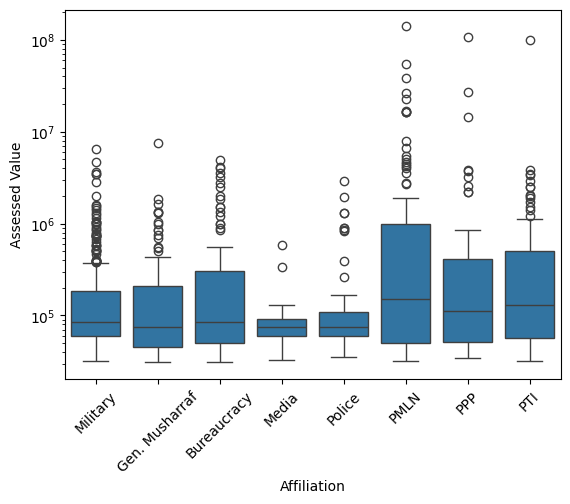

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 
df_high = df[df['Assessed Value'] > 30000].copy()
df_high = df_high[df_high['Affiliation'].map(df['Affiliation'].value_counts()) > 100]

sns.boxplot(data=df_high, x='Affiliation', y='Assessed Value')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

PMLN and PTI seem to have slightly higher median assessed values above 10000 PKR. 
Furthermore, there are extreme outlierss in PPP, PMLN, and PTI, which have up to 10 million or 100 million PKR gifts. 

In USD, that's around up to 360,000 USD. 

Let's zoom in and find out what percentage of these gifts which have values above 30,000 PKR have paid retention costs. 

In [16]:
mask=df['Assessed Value']>30000
mask.value_counts()

Assessed Value
False    3023
True     1191
Name: count, dtype: int64

There are 1191 gifts that are more than 30000. We would expect the retention cost above 0 to be 1191 data points as well. 

In [17]:
mask=(df['Assessed Value']>30000) & (df['Retention Cost']>0)
mask.value_counts()

False    3268
True      946
Name: count, dtype: int64

However, there's a discrepancy of about 20.6%. 

20% of people who have received gifts above 30000 do not report it. 


In [18]:
df_high = df[df['Assessed Value'] > 30000].copy()

df_high = df_high[
    df_high['Affiliation'].map(df['Affiliation'].value_counts()) > 100
].copy()

df_high['did_not_pay'] = df_high['Retention Cost'] == 0

df_high.groupby('Affiliation')['did_not_pay'].mean()

Affiliation
Bureaucracy       0.149425
Gen. Musharraf    0.127660
Media             0.079365
Military          0.111940
PMLN              0.314286
PPP               0.176471
PTI               0.522936
Police            0.078125
Name: did_not_pay, dtype: float64


Based off of that, then we have the highest which is PTI and PMLN. 
The lowest is police and media. 
This could be due to a few key factors. 
It could be the case that the police are receiving lower valued gifts thus they are more willing to pay it off compared to the ones received by PTI and PMLN which are political parties.
It could also be the case that the police are not receiving as many gifts above 30000. 
If we take a look at the boxplot again, we can see that this holds true, the standard deviation for police is much smaller than that for the political parties. 
Furthermore, the mean of police is also lower than that for political parties. 

However, as the data is not complete, 20% of data is missing for affiliation, it could be the case that the numbers may be lower or higher. More data for affiliation is needed for the picture to be complete.


**Conclusion**

While this dataset is not the most complete and broadly representative example of the various facets surrounding the issue of Pakistan Toshakhana, it does contain some interesting insights. From this project, we were able to determine that:

20% of people who have received gifts above 30000 do not report it. 

A larger proportion of PMLN and PTI do not pay their retention costs on their gifts compared to other categories such as police and media. 
Ultimately, we are left with more questions than we can answer, and further studies should investigate where this dataset cannot. Some questions to ponder as we conclude this project:

Does higher valued over 1 million experience more defaults than those just above 30000 but less than 1 million?

What are the sum of retention costs that higher valued items could have paid but did not? 
Were there any patterns or trends in the types of gifts received by different officials or from different countries?

Did any gifts received by government officials influence their decisions or actions while in office?

Additionally, with a more complete dataset, we may be able to recompute the values for affiliations and item categories, which may give a more accurate picture.